# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

방법론에 집중하다보면 데이터의 본질적 의미를 훼손하거나 망각할 수 있음  
EDA는 데이터 그 자체만으로 인사이트를 얻어내는 접근법!  

Titanic : Machine Learning from Disaster
- EDA 관점에서 좋은 데이터

### 1. 분석의 목적과 변수 확인
I. 분석의 목적 확인

- 살아남은 사람들은 어떤 특징을 가지고 있었을까?

II. 변수 확인
- 변수는 총 10개
- Variable : col name
- Definition : col information
- Key : encoding  


survival : 1 생존, 0 사망  
pclass : ticket class  
sex : sex  
age : age in years and fractional(분수) less than 1 and estimated is .5  
sibsp : sibling or spouses aboard the titanic  
parch : parents or children aboard the titanic  
ticket : ticket number  
fare : fare  
cabin : cabin number  
embarked : port of Embarkation(승선지)
- C : Cherbourg, Q : Queenstown, S = Southampton

## 0. 라이브러리 준비

In [7]:
## 라이브러리 불러오기

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [5]:
## 동일 경로에 "train.csv"가 있다는 가정
## 데이터 불러오기

titanic_df = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인

- 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [6]:
## 상위 5개 데이터 확인하기

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


결측치를 메꿔야 할 수도 있고 제거하거나 특정 방법으로 처리해야 할 수도 있음

In [8]:
## 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

- 데이터간의 상관관계가 있는지
- NA(결측치)가 없는지
- DATA SIZE가 적절한지(일반화 가능?)

In [11]:
## 데이터 전체 정보를 얻는 함수 : .describe()

titanic_df.describe() # 수치형 데이터에 대한 요약만을 제공(Cabin이나 Embarkation 정보는 없는 것을 알 수 있음)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


passengerid : 큰 의미가 있을까?  
survived : mean을 보니 생각보다 죽은 사람이 많다  
pclass : 큰 의미가 있을까?  
age : min = 0.42인 아기가 탑승했다  
sibsp : max = 8인 대가족이 탑승했다  
parch : max = 6인 대가족이 탑승했다  
fare : min = 0, max = 512 => mean = 32인데 max = 512이므로 outlier 일 가능성이 크다.(outlier : 데이터 분포도에서 많이 벗어난 데이터)  

In [15]:
## 상관계수 확인!

titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


main_diagonal은 항상 1  
금액과 등급은 반비례.  
등급이 높을수록 생존률이 높지 않을까?  

★ Correlation is NOT Causation  

상관성 : A up, B up, ...  
인과성 : A -> B

In [16]:
## 결측치 확인
## 비어있느지를 확인할 수 있고, 비어있는 것에 대해 의미 부여 가능

titanic_df.isnull().sum()
# Age, Cabin ,Embarked 에서 결측치 확인!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

- 각각의 feature가 무엇인지
- 특정 데이터가 특정 column에 따라 달라지는 의미
- 속성이 적절하게 매칭되어 있는가 (속성을 바꿔줄 필요가 있는가)

### I. Survived Column

In [21]:
##  생존자, 사망자 명수는?

# titanic_df['Survived'].sum()
# True 인 개수만 출력

# 전체 출력
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

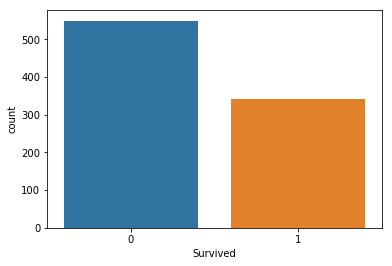

In [22]:
## 생존자 수와 사망자 수를 Barplot으로 그려보기 sns.coutnplot()

sns.countplot(x='Survived', data=titanic_df) # 카테고리 별로 카운트 된 모습을 출력
plt.show()

### II. Pclass

In [23]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [24]:
# 생존자 인원?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [25]:
# 생존 비율?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean() # sum / count

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

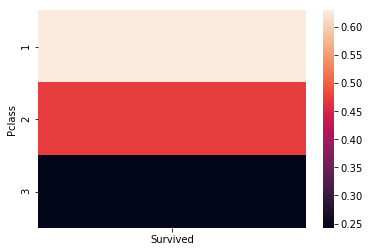

In [27]:
# 히트맵 활용

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

### III.Sex

In [34]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

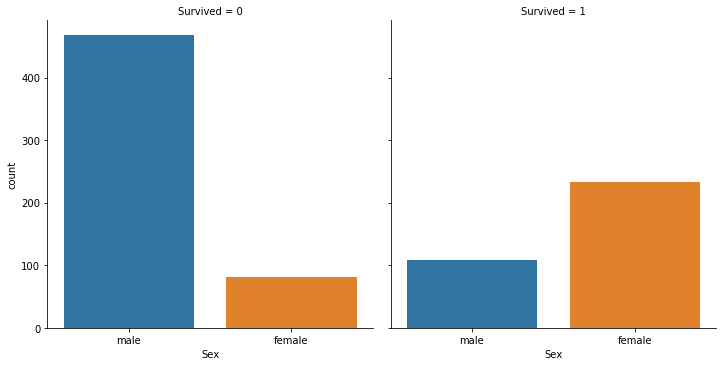

In [36]:
# sns.catplot

sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

### IV. Age
Remind : 결측치 존재!

In [38]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

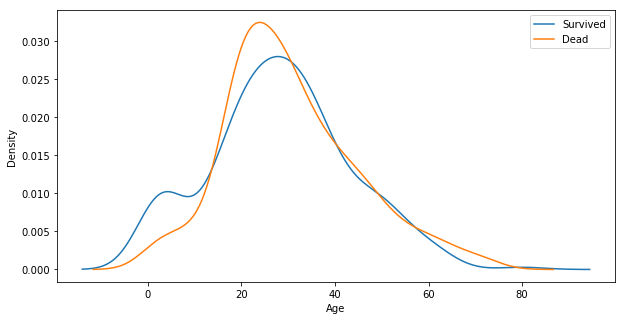

In [43]:
## Survived 1, 0과 Age의 경향성
## figure (도면) -> axis (틀) -> plot (그래프)

fig, ax = plt.subplots(1, 1, figsize=(10, 5)) # 가로 1개, 세로 1개, figsize
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.show()

### Appendix I. Sex + Pclass vs Survived

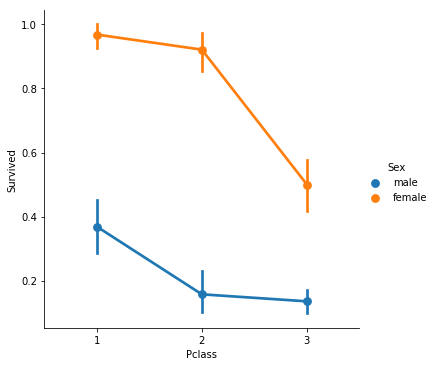

In [46]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()

### Apendix II. Age + Pclass

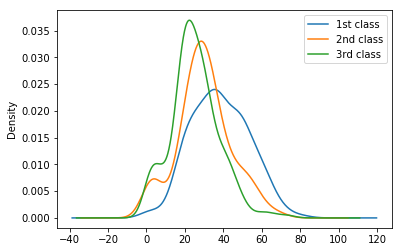

In [47]:
## Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 1. Fare

In [58]:
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Fare는 min은 0, max는 512의 범위를 가진다.  
countplot으로는 제대로 알기가 어렵다.  
아래는 실제 countplot을 적용한 모습

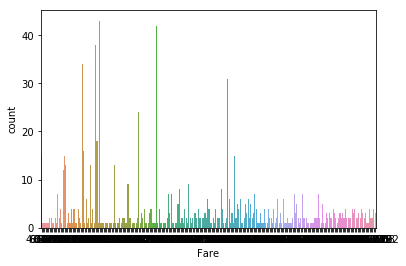

In [55]:
fare_surv = titanic_df.groupby(['Fare', 'Survived'])['Survived'].count()
sns.countplot(x=titanic_df['Fare'])
plt.show()

따라서, 변위의 범위를 지표로 나타내는 히스토그램을 사용한다.

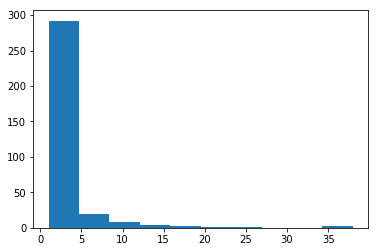

In [83]:
fare_surv = titanic_df.groupby(['Fare', 'Survived'])['Survived'].count()
plt.hist(fare_surv, bins=10)
plt.show()

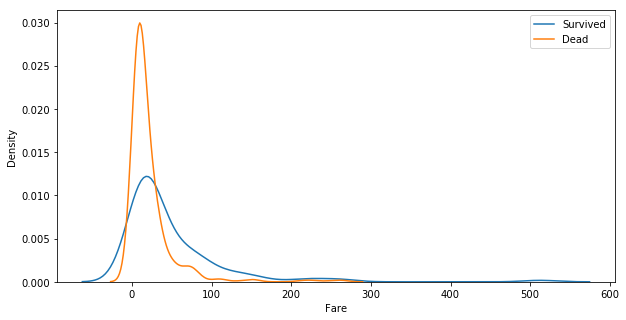

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) # 가로 1개, 세로 1개, figsize
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Fare'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Fare'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.show()

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()